In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pyod.models.ecod import ECOD
from pyod.models.lunar import LUNAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [2]:
letter = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\letter-unsupervised-ad.csv', header = None)

In [3]:
letter

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6.0,10.0,5.0,6.0,3.0,10.0,6.0,4.0,6.0,14.0,...,0.0,8.0,14.0,6.0,6.0,0.0,10.0,2.0,7.0,n
1,0.0,6.0,0.0,4.0,0.0,7.0,7.0,4.0,4.0,7.0,...,0.0,7.0,13.0,6.0,8.0,0.0,8.0,1.0,7.0,n
2,4.0,7.0,5.0,5.0,3.0,7.0,8.0,2.0,7.0,7.0,...,1.0,7.0,7.0,6.0,8.0,0.0,8.0,2.0,8.0,n
3,1.0,6.0,1.0,4.0,2.0,7.0,7.0,0.0,7.0,7.0,...,1.0,8.0,7.0,6.0,8.0,0.0,8.0,3.0,8.0,n
4,1.0,2.0,1.0,3.0,1.0,7.0,7.0,1.0,7.0,7.0,...,1.0,8.0,7.0,6.0,9.0,0.0,8.0,3.0,8.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.0,6.0,0.0,4.0,0.0,7.0,7.0,4.0,4.0,7.0,...,10.0,4.0,7.0,12.0,8.0,2.0,10.0,0.0,8.0,o
1596,5.0,8.0,6.0,7.0,6.0,6.0,9.0,5.0,7.0,8.0,...,4.0,14.0,9.0,6.0,8.0,0.0,8.0,8.0,8.0,o
1597,4.0,9.0,4.0,4.0,2.0,7.0,10.0,2.0,5.0,13.0,...,7.0,5.0,10.0,8.0,7.0,3.0,8.0,3.0,8.0,o
1598,6.0,10.0,6.0,7.0,5.0,5.0,11.0,3.0,7.0,11.0,...,2.0,3.0,12.0,6.0,5.0,2.0,9.0,8.0,8.0,o


In [4]:
shuffled_df = letter.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.135434,-0.918278,1.223567,-1.045376,0.268178,-0.130328,-0.810406,-0.196858,-0.576595,0.181144,...,-0.448042,2.849903,-1.574641,-0.607283,0.754397,0.289058,1.582926,-1.004452,-1.012496,0.478758
1,-0.318853,0.602364,-0.244255,0.337320,-0.116651,1.894192,1.010219,-0.196858,0.862644,-1.809447,...,2.479440,-0.854003,-0.128911,-1.003069,1.639320,0.289058,-0.936598,0.003781,-1.012496,0.478758
2,1.952585,0.298236,2.324433,0.798219,3.346811,0.544512,-0.082156,0.132956,-0.576595,-0.615093,...,-0.082107,0.829591,3.244458,-0.607283,-0.572988,4.611418,-0.936598,0.003781,2.125288,-0.854598
3,-1.227428,-2.134792,-0.978165,-2.428072,-1.271139,-0.130328,2.466719,-0.526671,-0.576595,-0.615093,...,1.381634,-0.180565,0.352999,1.767429,0.311935,-2.180862,-0.376704,0.507897,0.332269,-2.187955
4,1.044010,-0.310021,1.590522,0.337320,2.192324,1.219352,-0.082156,0.462770,-0.576595,-0.615093,...,-0.813977,0.829591,-1.092731,-1.003069,-0.130526,0.289058,0.743085,-1.004452,-0.564241,-0.187920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.135434,1.210621,0.489656,1.720017,1.037836,1.219352,1.010219,-0.196858,0.382897,-1.013211,...,1.747569,-1.190722,-0.128911,-1.003069,1.196859,0.289058,-0.936598,0.003781,-1.012496,0.478758
1596,1.498297,1.514750,0.489656,0.798219,0.268178,1.219352,-0.082156,-0.196858,0.862644,0.977380,...,1.015699,-0.180565,0.834909,-1.794639,2.081782,0.289058,-0.376704,2.020246,-0.564241,0.478758
1597,0.135434,-0.614149,0.122701,-0.123578,0.653007,-0.130328,0.281969,0.132956,0.862644,-0.615093,...,2.113505,-1.190722,0.352999,-1.398854,1.639320,0.289058,-0.936598,0.003781,-1.012496,0.478758
1598,-0.773141,0.602364,-0.978165,0.798219,-0.501481,-0.130328,-0.446281,-1.186299,1.342390,-0.615093,...,-0.448042,-1.190722,0.834909,-0.607283,-0.572988,0.289058,-0.936598,0.003781,0.332269,0.478758


In [6]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,32
0,0
1,0
2,1
3,0
4,0
...,...
1595,0
1596,0
1597,0
1598,0


ECOD

In [8]:
ecod = ECOD()
ecod.fit(df)

ECOD(contamination=0.1, n_jobs=1)

In [9]:
ecod_score = ecod.decision_function(df)

In [10]:
ecod_score

array([38.25898436, 45.01105052, 38.59581044, ..., 52.05586382,
       46.09509607, 41.8711661 ])

In [11]:
ecod_pred = ecod.predict(df)
ecod_pred

array([0, 0, 0, ..., 1, 0, 0])

In [12]:
ecod_acc = accuracy_score(y, ecod_pred)
ecod_acc

0.85125

0.5723466666666667


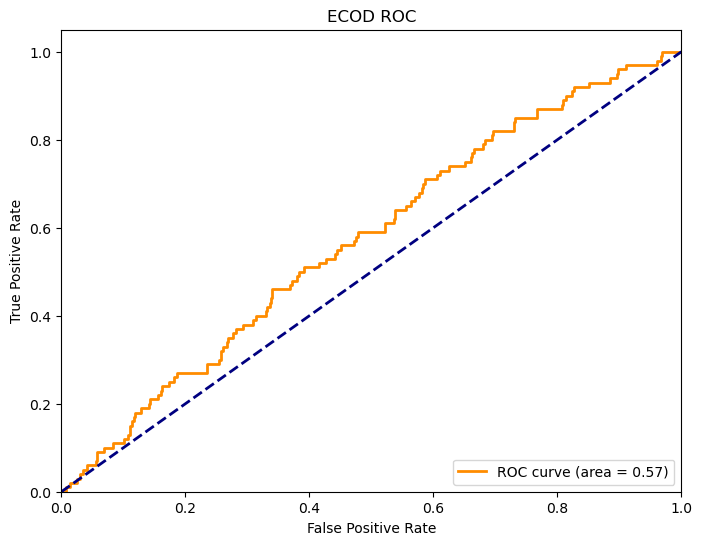

In [13]:
ecod_fpr, ecod_tpr, ecod_thresholds = roc_curve(y, ecod_score)
roc_auc = auc(ecod_fpr, ecod_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ecod_fpr, ecod_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ECOD ROC')
plt.legend(loc='lower right')
plt.show()

LUNAR

In [14]:
lunar = LUNAR()
lunar.fit(df)

LUNAR(contamination=0.1, epsilon=0.1, lr=0.001, model_type='WEIGHT',
   n_epochs=200, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
   scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

In [15]:
lunar_score = lunar.decision_function(df)
lunar_score

array([ 0.15118992, -0.6241954 , -0.1400305 , ..., -0.2764635 ,
        0.02731347, -0.11076057], dtype=float32)

In [16]:
lunar_pred = lunar.predict(df)
lunar_pred

array([1, 0, 0, ..., 0, 0, 0])

In [17]:
lunar_acc = accuracy_score(y,lunar_pred)
lunar_acc

0.89875

0.8574466666666667


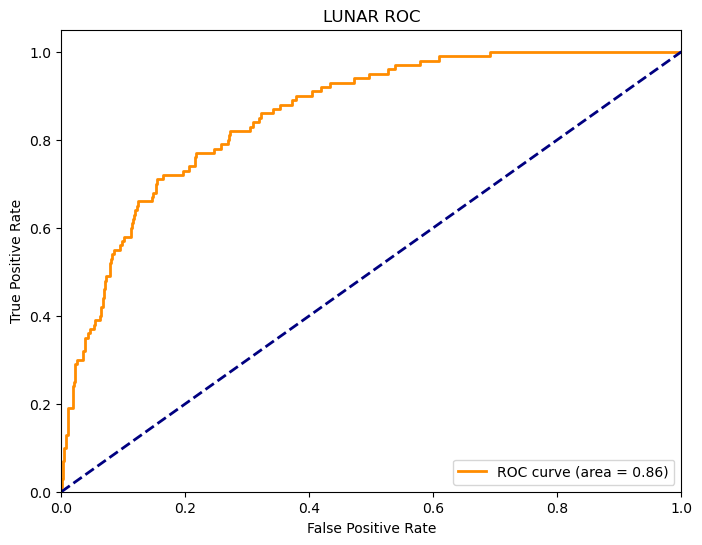

In [18]:
lunar_fpr, lunar_tpr, lunar_thresholds = roc_curve(y, lunar_score)
roc_auc = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lunar_fpr, lunar_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LUNAR ROC')
plt.legend(loc='lower right')
plt.show()

In [19]:
y_array = y.values.ravel()

score_df = pd.DataFrame({'lunar_score': lunar_score, 'ecod_score': ecod_score, 'y': y_array})
score_df

,lunar_score,ecod_score,y
0,0.151190,38.258984,1
1,-0.624195,45.011051,0
2,-0.140031,38.595810,0
3,-0.317395,38.482046,0
4,-0.240166,35.270472,0
...,...,...,...
1595,0.033770,44.182419,0
1596,-0.234443,39.202359,0
1597,-0.276464,52.055864,0
1598,0.027313,46.095096,0


In [20]:
x = score_df[['lunar_score', 'ecod_score']]
y = score_df['y']

In [21]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9375


In [24]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9414
Test set score: 0.9375


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cv_scores = cross_val_score(logreg, x, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores)}')


Cross-Validation Scores: [0.940625 0.934375 0.94375  0.94375  0.940625]
Average Cross-Validation Score: 0.940625


0.8785066666666667


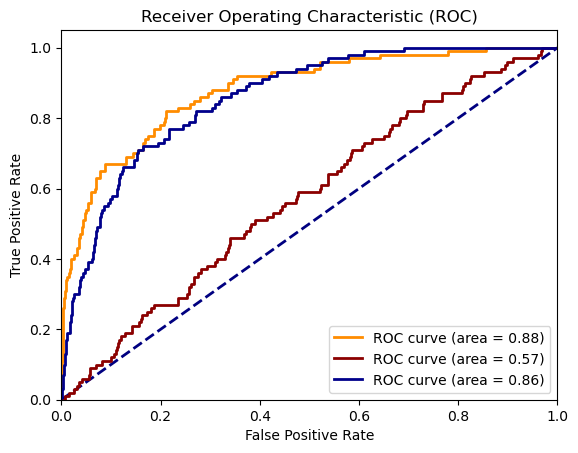

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get predicted probabilities for the test set
y_prob = logreg.predict_proba(x)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc_ecod = auc(ecod_fpr, ecod_tpr)
roc_auc_lunar = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(ecod_fpr, ecod_tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ecod)
plt.plot(lunar_fpr, lunar_tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lunar)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [7]:
lunar_accuracies = []
ecod_accuracies = []
ensemble_accuracies = []
lunar_auc = []
ecod_auc = []
ensemble_auc = []

for i in range (10):
  lunar = LUNAR()
  lunar.fit(df)
  lunar_pred = lunar.predict(df)
  lunar_scores = lunar.decision_function(df)
  lunar_scores1 = lunar.decision_scores_
  lunar_acc = accuracy_score(y,lunar_pred)
  lunar_auc_scores = roc_auc_score(y, lunar_scores1)
  ecod = ECOD()
  ecod.fit(df)
  ecod_pred = ecod.predict(df)
  ecod_scores1 = ecod.decision_function(df)
  ecod_scores = ecod.decision_function(df)
  ecod_acc = accuracy_score(y,ecod_pred)
  ecod_auc_scores = roc_auc_score(y, ecod_scores1)

  y_array = y.values.ravel()

  score_df = pd.DataFrame({'lunar_score': lunar_scores, 'ecod_score': ecod_scores, 'y': y_array})
  score_df

  x = score_df[['lunar_score', 'ecod_score']]
  y = score_df['y']
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  logreg = LogisticRegression(solver='liblinear', random_state=0)
  logreg.fit(x_train, y_train)
  y_pred_test = logreg.predict(x_test)
  
  ensemble_acc = accuracy_score(y_test,y_pred_test)
  y_prob = logreg.predict_proba(x)[:, 1]
  fpr, tpr, thresholds = roc_curve(y, y_prob)
  ensemble_auc_scores = auc(fpr, tpr)
  
  lunar_accuracies.append(lunar_acc)
  ecod_accuracies.append(ecod_acc)
  ensemble_accuracies.append(ensemble_acc)
  lunar_auc.append(lunar_auc_scores)
  ecod_auc.append(ecod_auc_scores)
  ensemble_auc.append(ensemble_auc_scores)


avg_lunar_acc = np.mean(lunar_accuracies)
avg_ecod_acc = np.mean(ecod_accuracies)
avg_ensemble_acc = np.mean(ensemble_accuracies)

avg_lunar_auc = np.mean(lunar_auc)
avg_ecod_auc = np.mean(ecod_auc)
avg_ensemble_auc = np.mean(ensemble_auc)


print(avg_lunar_acc,avg_ecod_acc,avg_ensemble_acc)

print(avg_lunar_auc,avg_ecod_auc,avg_ensemble_auc)

  

0.901375 0.85125 0.9578125000000002
0.8217573333333335 0.5723466666666666 0.8467366666666667
